In [2]:
import requests
import gzip
import os
import hashlib
import numpy as np

In [14]:
def fetch(url):
  fp = os.path.join("/Users/vrindavan/Datasets/mnist", hashlib.md5(url.encode("utf-8")).hexdigest())
  if os.path.isfile(fp):
    with open(fp, "rb") as f:
      dat = f.read()
  else:
    with open(fp, "wb") as f:
      dat = requests.get(url).content
      f.write(dat)
  return np.frombuffer(gzip.decompress(dat), dtype=np.uint8).copy()


X_train = fetch("https://ossci-datasets.s3.amazonaws.com/mnist/train-images-idx3-ubyte.gz")[0x10:].reshape((-1, 28, 28))
Y_train = fetch("https://ossci-datasets.s3.amazonaws.com/mnist/train-labels-idx1-ubyte.gz")[8:]
X_test = fetch("https://ossci-datasets.s3.amazonaws.com/mnist/t10k-images-idx3-ubyte.gz")[0x10:].reshape((-1, 28, 28))
Y_test = fetch("https://ossci-datasets.s3.amazonaws.com/mnist/t10k-labels-idx1-ubyte.gz")[8:]

In [15]:
Y_test[:20]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4],
      dtype=uint8)

In [16]:
import matplotlib.pyplot as plt

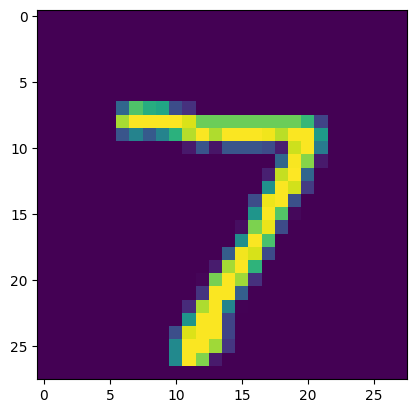

In [17]:
plt.imshow(X_test[0])

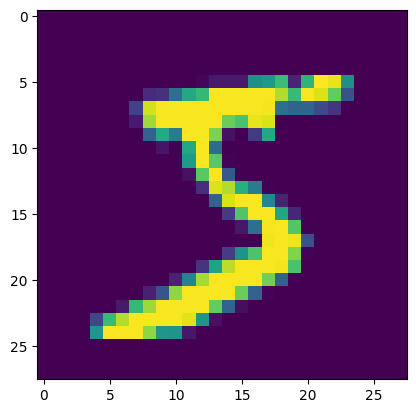

In [18]:
plt.imshow(X_train[0])

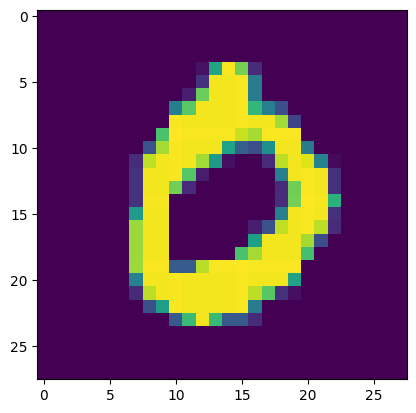

In [7]:
plt.imshow(X_test[3])

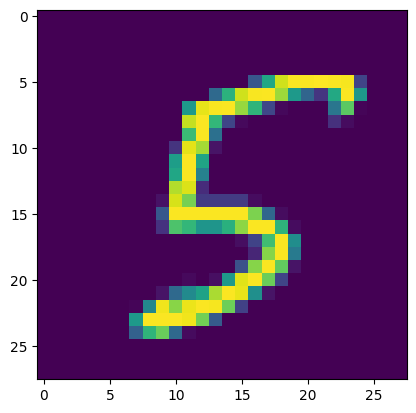

In [8]:
plt.imshow(X_test[23])

In [9]:
# Subsample the data for more efficient code execution in this exercise
num_training = 5000
mask = list(range(num_training))
X_train = X_train[mask]
Y_train = Y_train[mask]


num_test = 500
mask = list(range(num_test))
X_test = X_test[mask]
Y_test = Y_test[mask]

# Reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1)) / 255
X_test = np.reshape(X_test, (X_test.shape[0], -1)) / 255
print(X_train.shape, X_test.shape)

(5000, 784) (500, 784)


In [10]:
from knn import KNearestNeighbor

classifier = KNearestNeighbor()
classifier.train(X_train, Y_train)

In [11]:
y_pred_temp = classifier.predict(X_test, k=10, num_loops=0)
num_correct = np.sum(y_pred_temp == Y_test)
accuracy = float(num_correct) / num_test
print("Got %d / %d correct => accuracy: %f" % (num_correct, num_test, accuracy))

Got 445 / 500 correct => accuracy: 0.890000
